# Figure Generation Master Script
This python notebook is used to generate all of the python plots presented in the main and supplementary figures of the paper. The notebook is spit into two sections, one for `Main Figures` and another for `Supplementary Figures`. In each section, you will find markdown above each executable code cell that indicates which figure plots it will generate. Please note that many of our figures are cartoons and thus cannot be recreated in this notebook. By default the plots will display inline, but you can modify the function cell to save pngs if you so wish. To begin, please execute the first two cells that import the necessary libraries and define the figure master function, respectively.

**Note**: Generally, evaluation metrics tied to figures will be presented in this notebook along with the corresponding figure. For example, the cell for Main Figure 5 will also produce the correlation values for panel a and the survival metrics for pandel d. To replicate the  metrics reported in the paper that may not be tied to a figure (i.e. NPV, precision, correlations), please execute the appropriate functions found in our [Metrics](Util/metricUtils.py) file. 

In [13]:
## Import all libraries

import os, sys
wrkDir=os.getcwd()
assert os.path.exists(os.path.join(wrkDir,'Parameters/Project_Paths.yaml')),\
    "Current working directory does not match project directory, please change to"+\
        "correct working directory"
ROOT_DIR=wrkDir
sys.path.insert(0, ROOT_DIR)

import seaborn as sns
import numpy as np
import pickle
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from matplotlib.colors import ListedColormap
from scipy.stats import rankdata
from lifelines import KaplanMeierFitter
import pandas as pd 
import yaml


from glob import glob
import pickle

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec

%matplotlib inline

from scipy import stats

with open(os.path.join(ROOT_DIR,'Parameters/Figure_Params.yaml')) as file:
    figParams = yaml.full_load(file)
with open(os.path.join(ROOT_DIR,'Parameters/Project_Paths.yaml')) as file:
    projectPaths = yaml.full_load(file)



import Util.plotUtils as PlUtils
import Util.metricUtils as metricUtils

import Figure_Generation.AUC_Plots as AUC
import Figure_Generation.Figure5ab_Plots as fig5ab 
import Figure_Generation.Sensitivity_Plots as asp
import Figure_Generation.Plot_Focal_Samples as pfs
import Figure_Generation.TMA_Activations_Fig4ac as TMA_Maps
import Figure_Generation.Figure5_Full_Plot as sfp
import Figure_Generation.Grade_Survival as gs
import Figure_Generation.Guided_Sequencing as seq
import Figure_Generation.ColorSpaceDistributions as csd
import Figure_Generation.Handcrafted_Features as hcf
import Figure_Generation.GradeVsMutation as gvm

import warnings
warnings.filterwarnings('ignore')

# Define plotting parameters
fontSize=figParams['fontsize']
mutColors=figParams['colors']
wtColors=figParams['wtColors']
geneList=figParams['geneList']

In [14]:
# Define function used to generate figures from corresponding files

def Figure_Specific_Plots(figureType,figureNum):
    """
    

    Parameters
    ----------
    figureType : string
        main or supplementary. This defines the type of figure you wish to plot
    figureNum : int
        An interger that defines the figure number based on the paper.

    Returns
    -------
    None.

    """
    
    
    assert figureType in ['main','supplementary'], 'Figure must be from Main or Supplementary Figures'

    if figureType=='main':
        figureLimit=5
        assert figureNum in np.arange(figureLimit)+1, 'This figure number does not exist in Main Figures. Please select number between 1 and 5'
        if figureNum==1:
            print('\nThis figure is a cartoon and was not generated using python')
        elif figureNum==2:
            print('\nParts a-b of this figure are cartoons. Only c-d are generated using python')
            AUC.PlotWsiSlideAUCs(cohort='WSI', missenseAsWT=False)
            AUC.PlotWsiSlideAUCs(cohort='TCGA', missenseAsWT=False)
            asp.SensitivityPlot()
        elif figureNum==3:
            pfs.Figure4Plots()
            AUC.PlotWsiRegionAUCs()
        elif figureNum==4:
            TMA_Maps.Plot_TMA_ActivationMaps()
            AUC.PlotTmaAUCs(includedTMA='main',patientLevel=False,norm=True)
        elif figureNum==5:
            sfp.PlotFigure5()
            _,_,spearman=metricUtils.GeneIndependenceTests(['BAP1','PBRM1'])
            print('\nCorrelation and p-value for gene independence: ', spearman,'\n')
            continuousMetrics, discreteMetrics=gs.Plot_Survival(returnValsOnly=True)
            contHR,contPval,contCI_Pred,contCI_True=continuousMetrics
            discHR, discPvals=discreteMetrics
            
            print("Values for survival analysis with Cox Proportional Hazard model using BAP1 prediction as a continuous variable without stratification: \n")
            print('P-Value: ', contPval)
            print('Hazard Ratios: ', contHR)
            print("Concordance Index for BAP1 Prediction: ", contCI_Pred)
            print("Concordance Index for BAP1 True Status: ", contCI_True,'\n')
            
            print("Values for survival analysis with Cox Proportional Hazard model using BAP1 prediction as a discrete variable with stratification at 0.5: \n")
            print('P-Value: ', discPvals)
            print("Hazard Ratio: ", discHR)
            
    elif figureType=='supplementary': 
        figureLimit=18
        assert figureNum in np.arange(figureLimit)+1, 'This figure number does not exist in Supplementary Figures. Please select number between 1 and 19'
        if figureNum==1:
            print('\nThis figure is a cartoon and was not generated using python')
        
        elif figureNum==2:
            print('\nThis figure is a cartoon and was not generated using python')
        
        elif figureNum==3:
            print('\nThis figure is a cartoon and was not generated using python')
        
        elif figureNum==4:
            print('\nThis figure is a cartoon and was not generated using python')
        
        elif figureNum==5:
            AUC.PlotWsiSlideAUCs(cohort='TCGA',missenseAsWT=True)
            gvm.Plot_GradeVsMutation('BAP1',projectPaths)
            gvm.Plot_GradeVsMutation('PBRM1',projectPaths)
            gvm.Plot_GradeVsMutation('SETD2',projectPaths)
            
        elif figureNum==6:
            geneActivations, geneIsWT, geneIsFocal=asp.LoadData(classifier='region', norm=True, cohort='WSI') 
            asp.PlotSimpleSensitivity(geneActivations,geneIsWT,geneIsFocal,gene='BAP1') 
            
            geneActivations, geneIsWT, geneIsFocal=asp.LoadData(classifier='region', norm=True, cohort='TMA1') 
            asp.PlotSimpleSensitivity(geneActivations,geneIsWT,geneIsFocal,gene='BAP1') 
            
            geneActivations, geneIsWT, geneIsFocal=asp.LoadData(classifier='region', norm=True, cohort='TMA2') 
            asp.PlotSimpleSensitivity(geneActivations,geneIsWT,geneIsFocal,gene='BAP1') 
            
            geneActivations, geneIsWT, geneIsFocal=asp.LoadData(classifier='region', norm=True, cohort='PDX1') 
            asp.PlotSimpleSensitivity(geneActivations,geneIsWT,geneIsFocal,gene='BAP1') 
            
        elif figureNum==7:
            pfs.SuppFigure7Plots()
        
        elif figureNum==8:
            seq.PlotWsiSequencing()
            seq.PlotTmaSequencing()
    
        elif figureNum==9:
            csd.PlotColorDistribution()
            AUC.PlotTmaAUCs(includedTMA='all',patientLevel=False,norm=False)
        
        elif figureNum==10:
            asp.SensitivityComparison()
        
        elif figureNum==11:
            AUC.PlotTmaAUCs(includedTMA='all',patientLevel=True,norm=True)
        
        elif figureNum==12:
            genePair1=['BAP1','SETD2']
            fig5ab.ClassificationIndependence(genePair1)
            _,_,spearman1=metricUtils.GeneIndependenceTests(genePair1)
            print('Correlation and p-value for gene pair ', genePair1 ,': ',spearman1)
            
            genePair2=['PBRM1','SETD2']
            fig5ab.ClassificationIndependence(genePair2)
            _,_,spearman2=metricUtils.GeneIndependenceTests(genePair2)
            
            print('Correlation and p-value for gene pair ', genePair2 ,': ',spearman2)
            
        elif figureNum==13:
            print('\nThis figure is a cartoon and was not generated using python')
            
        elif figureNum==14:
            plt.figure(figsize=(10,10))
            hcf.Random_Forest_Classifier(gene='BAP1', projectDir=ROOT_DIR, 
                                         projectPaths=projectPaths)
            plt.figure(figsize=(10,10))
            hcf.Random_Forest_Classifier(gene='PBRM1', projectDir=ROOT_DIR, 
                                         projectPaths=projectPaths)
            plt.figure(figsize=(10,10))
            hcf.Random_Forest_Classifier(gene='SETD2', projectDir=ROOT_DIR, 
                                         projectPaths=projectPaths)
            
        elif figureNum==15:
            hcf.Plot_Important_Features(gene='BAP1', projectDir=ROOT_DIR, 
                                        projectPaths=projectPaths)
        elif figureNum==16:
            hcf.Plot_Important_Features(gene='PBRM1', projectDir=ROOT_DIR, 
                                        projectPaths=projectPaths)
        elif figureNum==17:
            hcf.Plot_Important_Features(gene='SETD2', projectDir=ROOT_DIR, 
                                        projectPaths=projectPaths)
        
        elif figureNum==18:
            # gs.PlotGradeSupplement()
            plt.figure(figsize=(12,5))
            gs.Plot_Grades('TMA1_Punch', groupGrades=True)
            plt.figure(figsize=(12,5))
            gs.Plot_Grades('TMA2_Patient', groupGrades=False)
      

# `Main Figures`

The next few cells will generate all plots found in in the panels of the `Main Figures` of the paper. Please note that cartoon panels of figures are not represented here. Consequently all of main figure 1 cannot be regenerated using this notebook. Please make sure to execute the cell directly below this one to establish the figureType as 'main' before attempting to execute any of the main figure cells.

In [5]:
figureType='main'

## Figure 2: Slide-level workflow and performance 
For this figure only panels c-e are generated systematically. 


Parts a-b of this figure are cartoons. Only c-d are generated using python


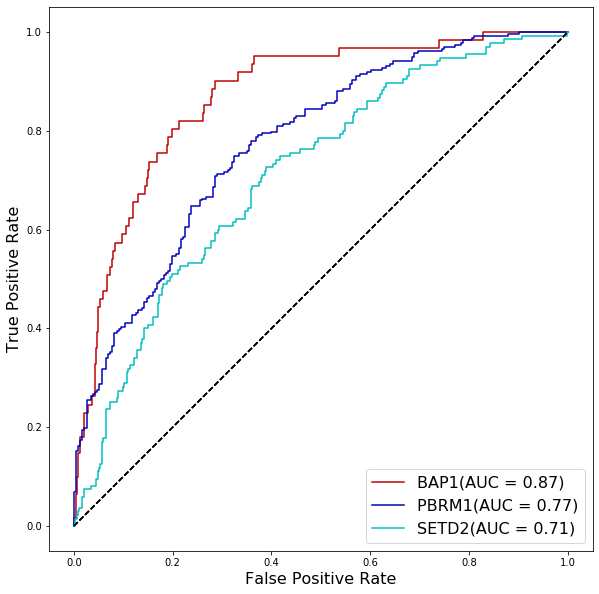

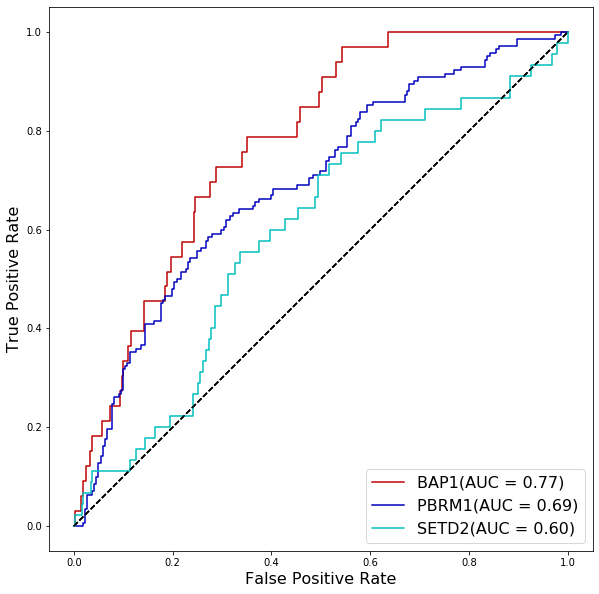

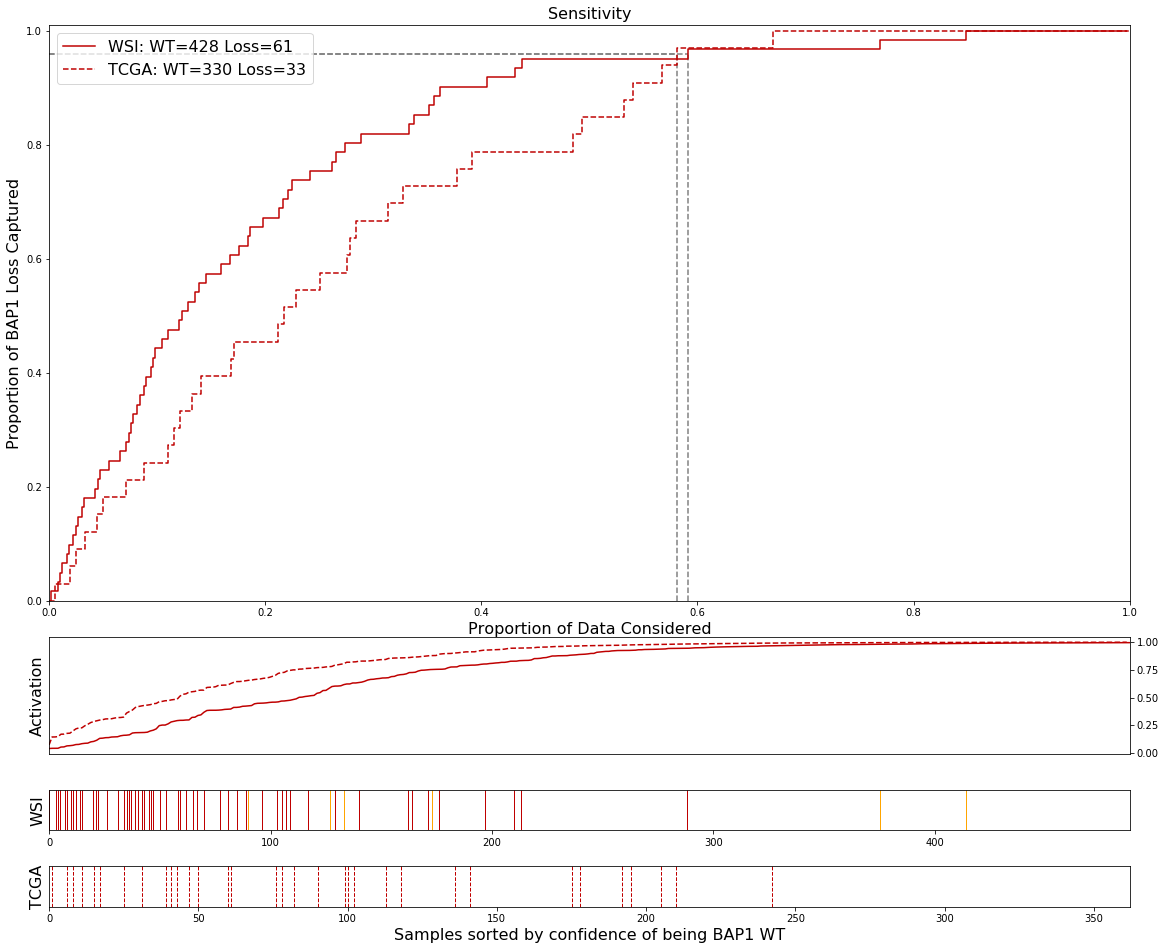

In [7]:
# Figure 2
figureNum=2
Figure_Specific_Plots(figureType, figureNum)

## Figure 3: Predicting at high spatial resolution allows us to probe tissue heterogeneity (region level performance)
Please note that this figure was cropped and rotated in the final presentation to best display only the relevant **tumor tissue**

100%|██████████| 484/484 [01:07<00:00,  7.15it/s]


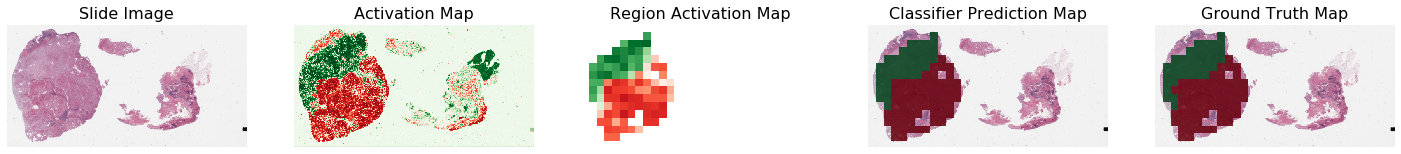

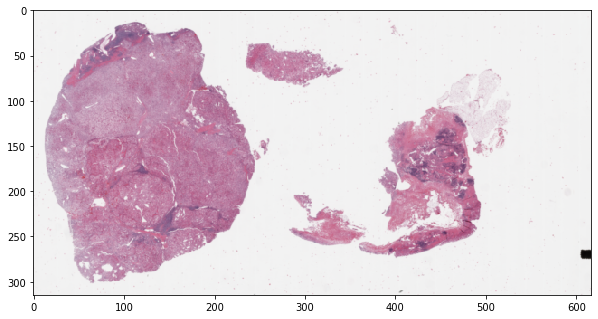

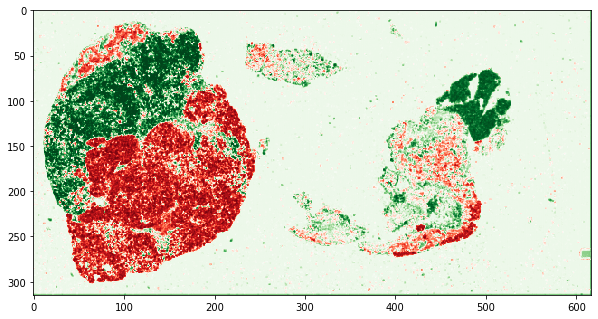

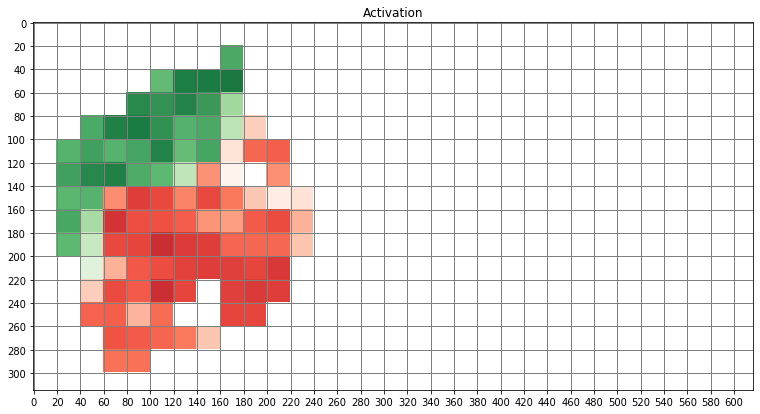

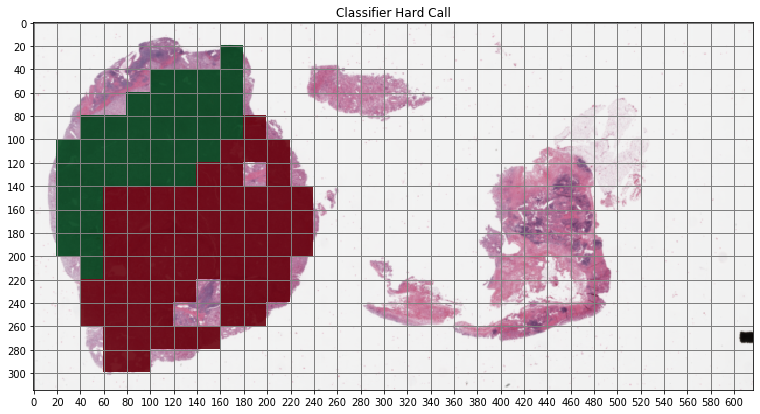

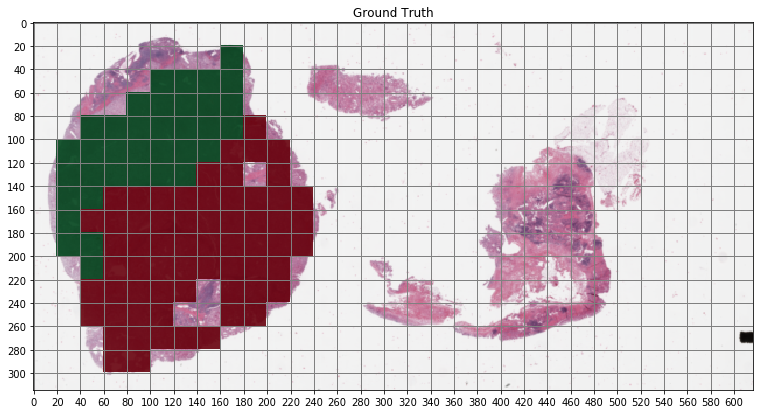

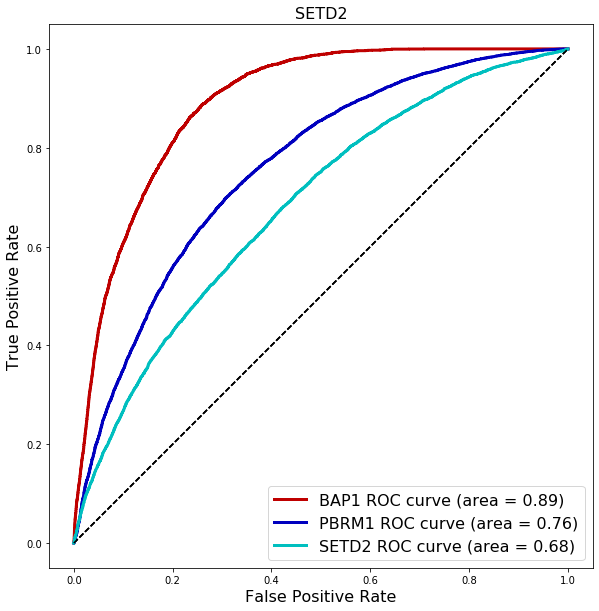

In [8]:
# Figure 3
figureNum=3
Figure_Specific_Plots(figureType, figureNum)

## Figure 4: Region classification validation on external cohorts 
Please note that the first image was cropped in the final presentation to show a more detailed example area of the activation maps showing consensus predictions for each TMA core.


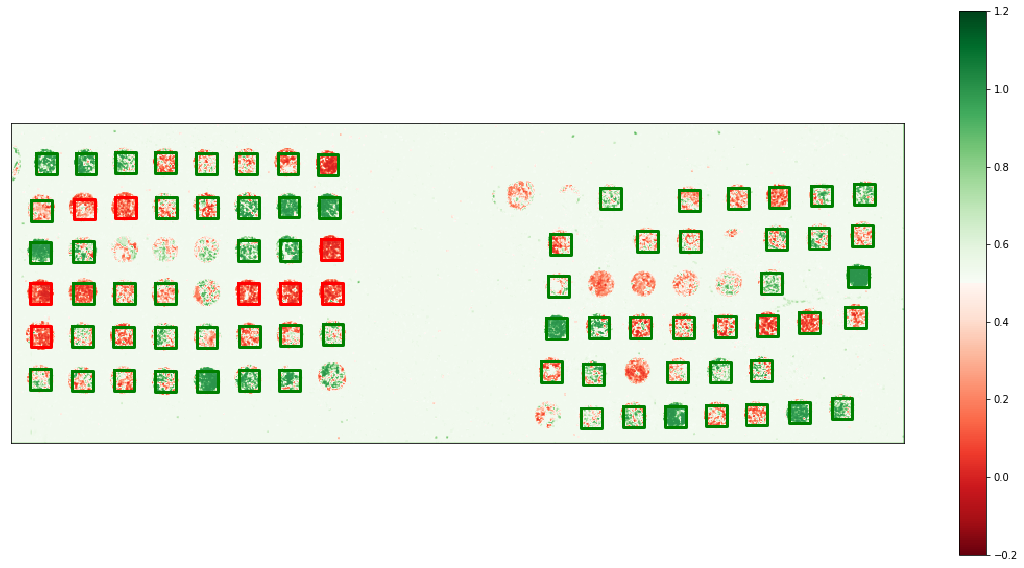

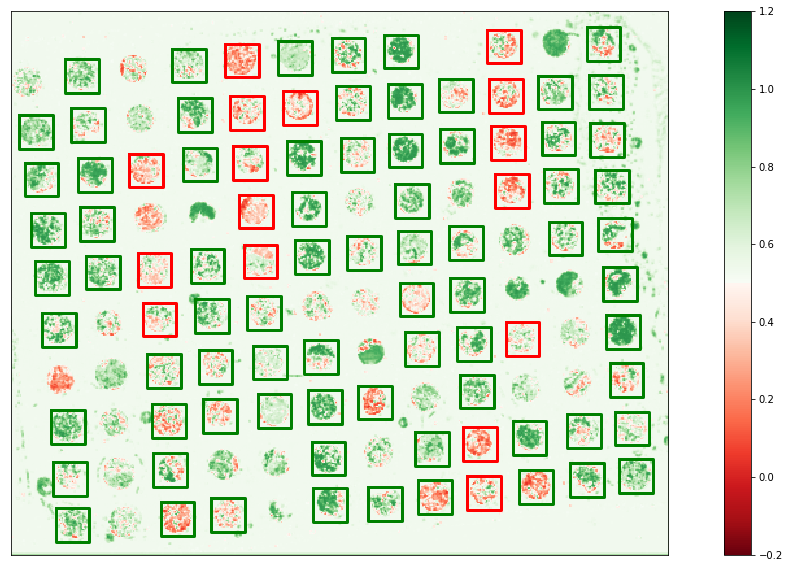

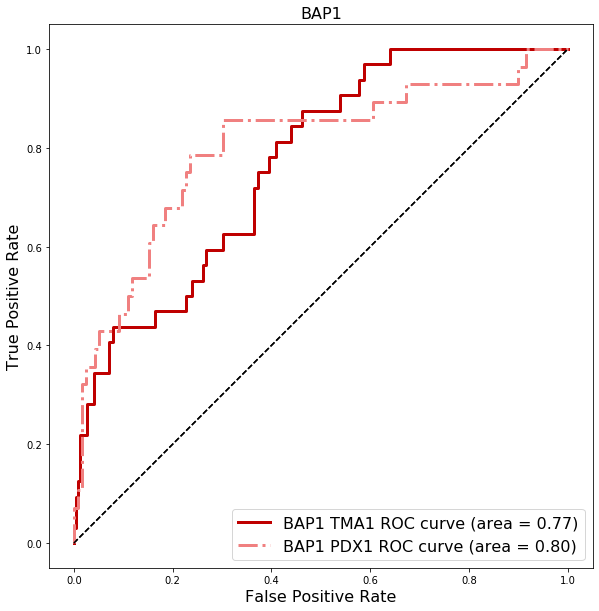

In [15]:
# Figure 4
figureNum=4
Figure_Specific_Plots(figureType, figureNum)

## Figure 5: Interpretation of results 
Please note that for this figure we have provided the additional metrics that are reported in the main text. Speficically, you can find the correllation values for panel **a** and the survival metrics reported for panel **d**

LowGrade_Loss v.s. LowGrade_WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.861e-06 U_stat=2.640e+02
HighGrade_Loss v.s. HighGrade_WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.416e-04 U_stat=7.740e+02

Correlation and p-value for gene independence:  SpearmanrResult(correlation=-0.3259764104401021, pvalue=6.730817763998291e-13) 

Values for survival analysis with Cox Proportional Hazard model using BAP1 prediction as a continuous variable without stratification: 

P-Value:  0.008692068122984573
Hazard Ratios:  5.434903063157894
Concordance Index for BAP1 Prediction:  0.6502768920959893
Concordance Index for BAP1 True Status:  0.5474072831011915 

Values for survival analysis with Cox Proportional Hazard model using BAP1 prediction as a discrete variable with stratification at 0.5: 

P-Value:  {'True_BAP1': 0.11067775275246561, 'Pred_BAP1': 0.002678952349494057}
Hazard Ratio:  {'True_BAP1': 1.7998759897914207, 'Pred_BAP1': 2.52

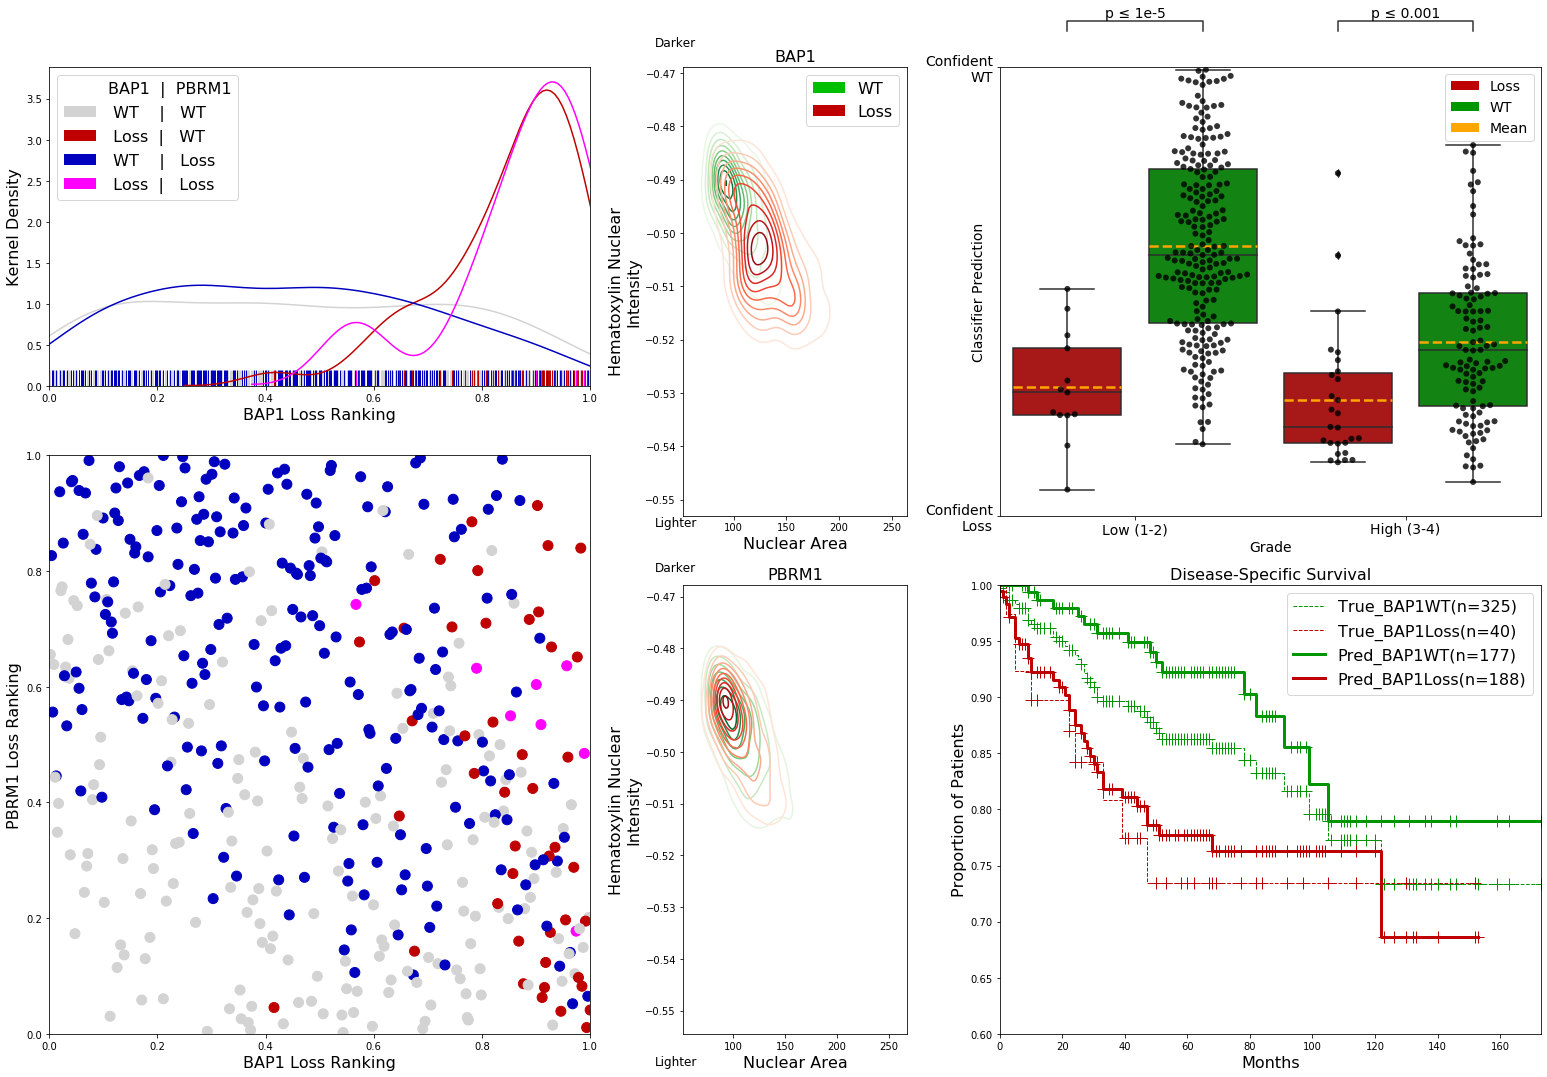

In [15]:
# Figure 5
figureNum=5
Figure_Specific_Plots(figureType, figureNum)

# `Supplementary Figures`
The remaining cells in this script will generate all of the `Supplementary Figures` referenced in the paper. Similar to the main figures, the cartoon portions of the figures are not generated here. Thus, supplementary figures 1-4 cannot be generated here. 

In [2]:
figureType='supplementary'

## Supplementary Figure 5: Effect of missense mutations and grade in predictions on TCGA 

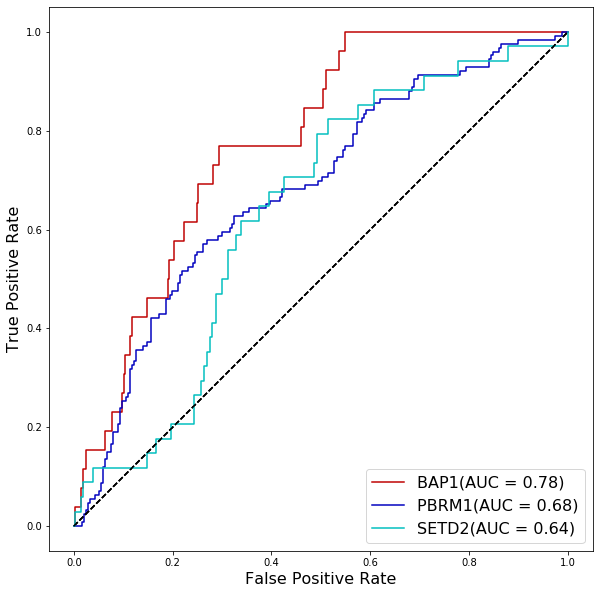

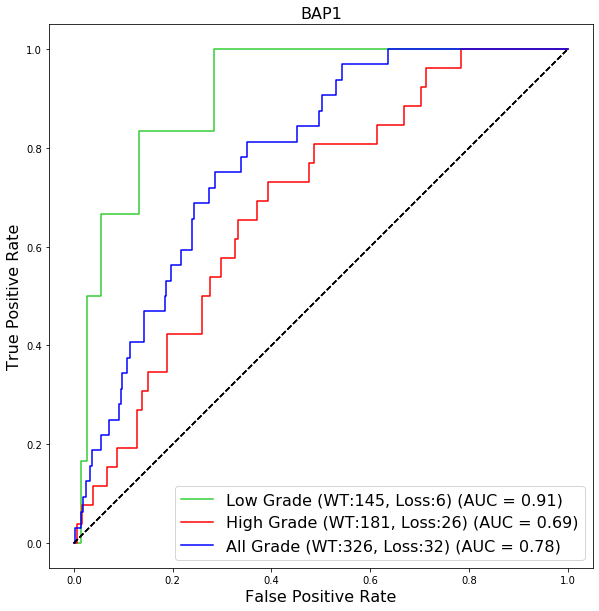

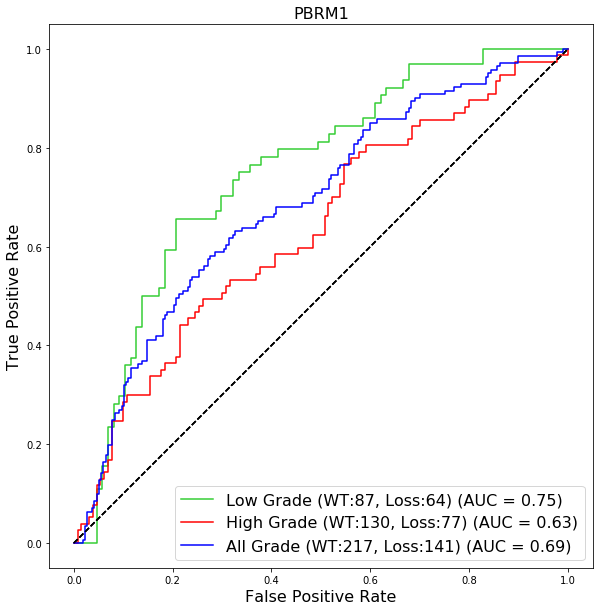

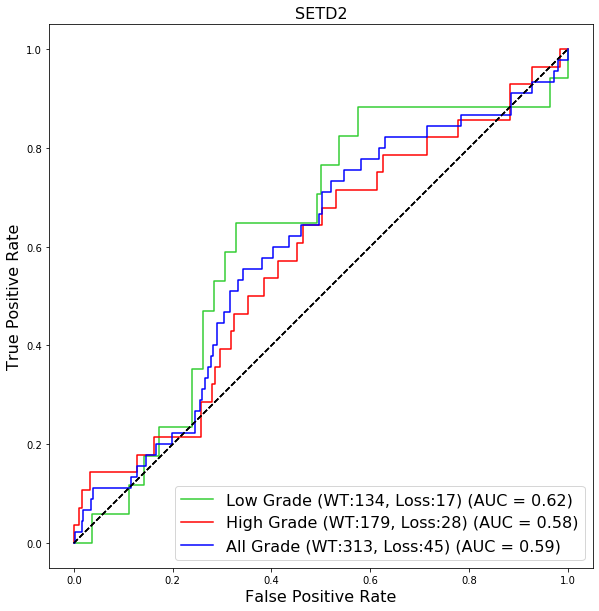

In [5]:
# Supplementary Figure 5
figureNum=5
Figure_Specific_Plots(figureType, figureNum)

## Supplementary Figure 6: Region classification model can rule out WT regions in holdout and TMA cohorts

  0%|          | 0/510 [00:00<?, ?it/s]

Plotting regional results


100%|██████████| 510/510 [05:09<00:00,  1.65it/s]


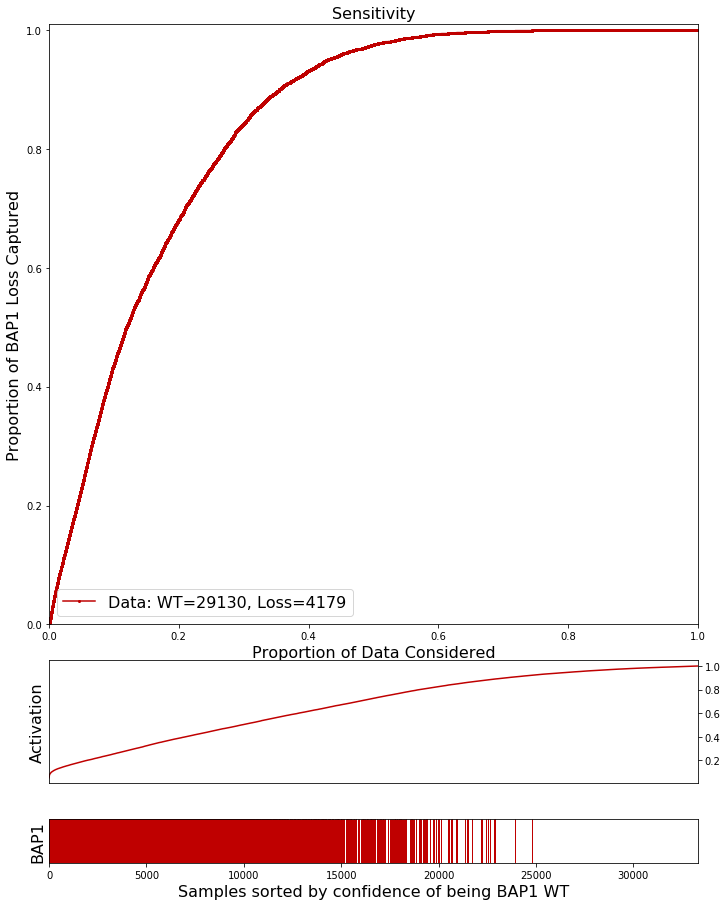

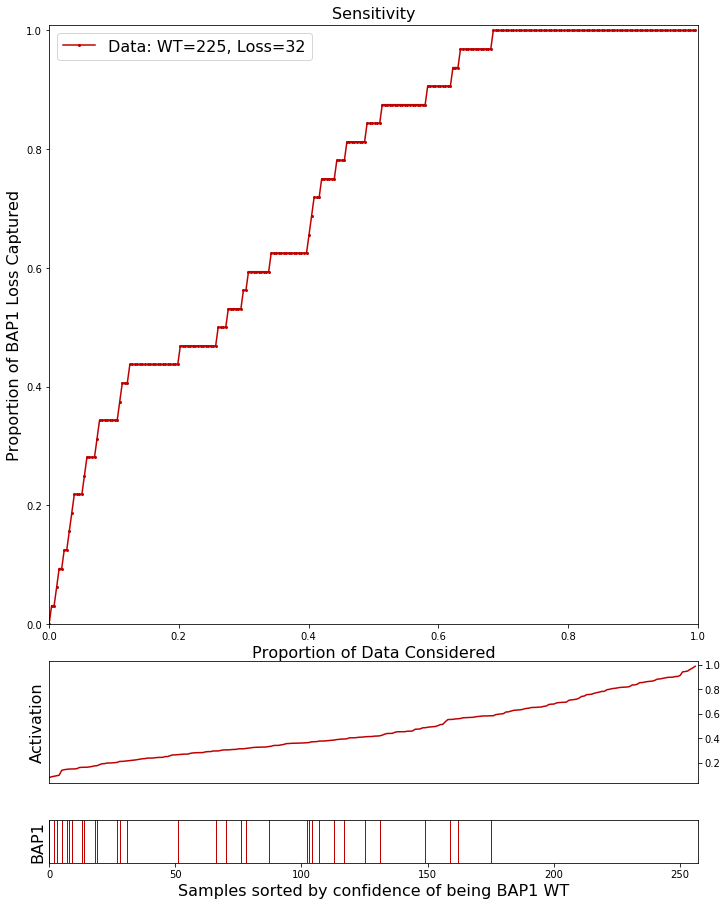

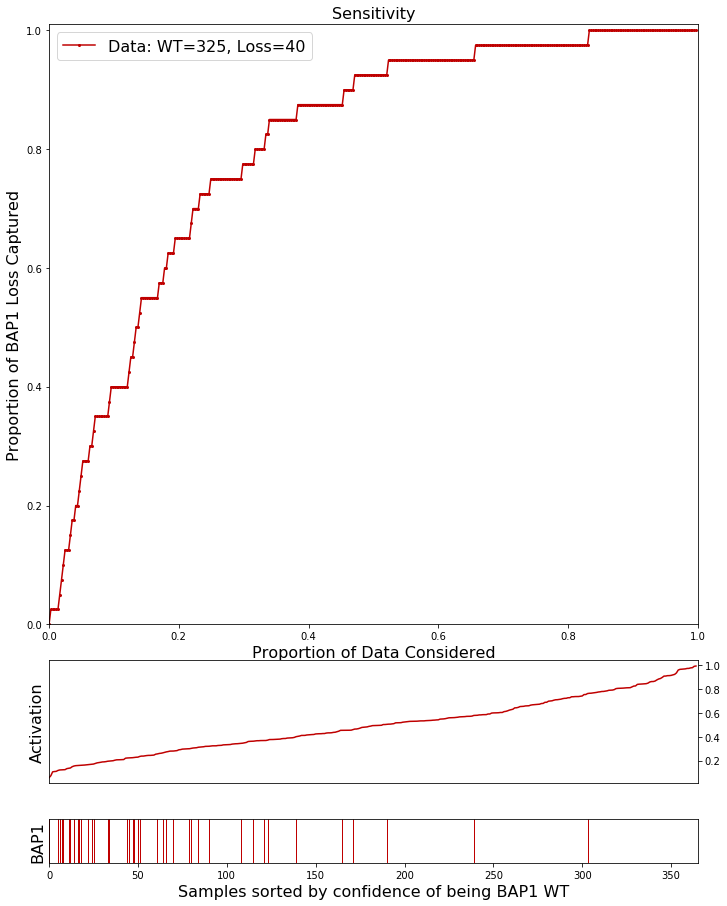

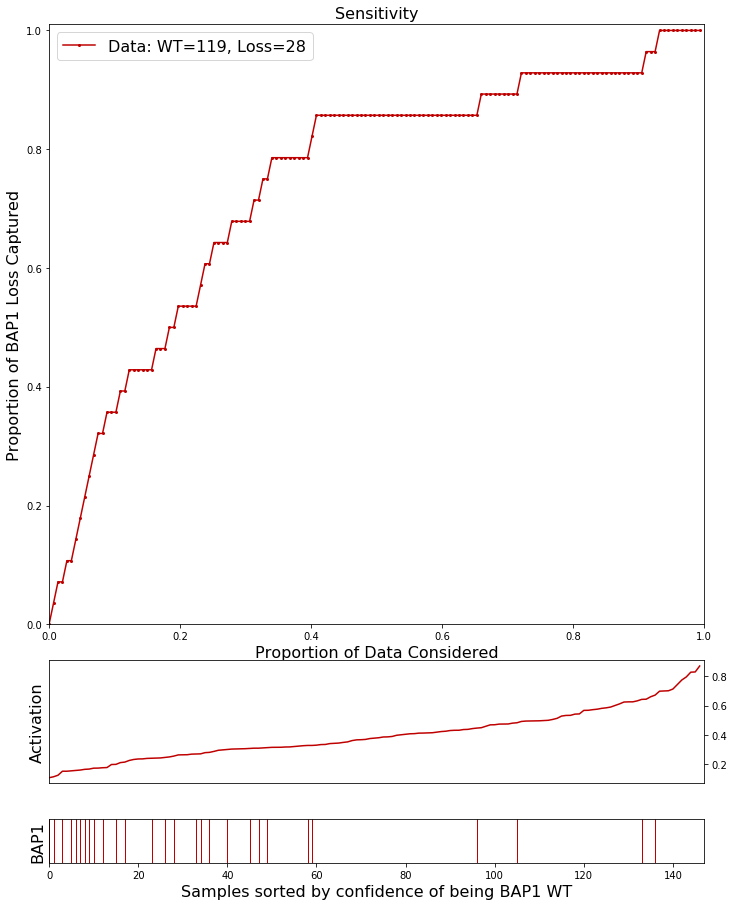

In [6]:
# Supplementary Figure 6
figureNum=6
Figure_Specific_Plots(figureType, figureNum)

## Supplementary Figure 7: More regional classification results on LL Cases

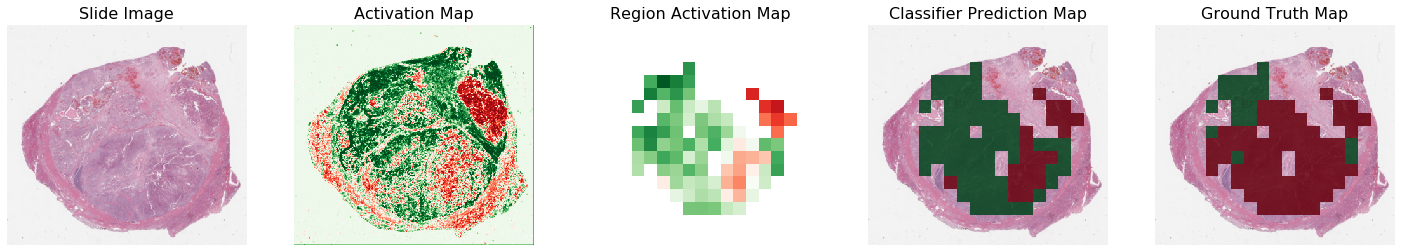

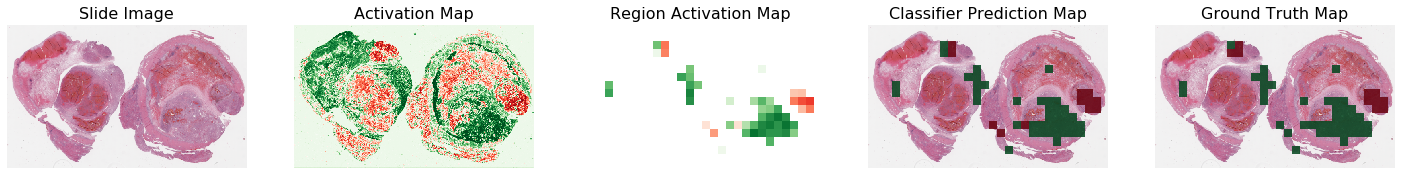

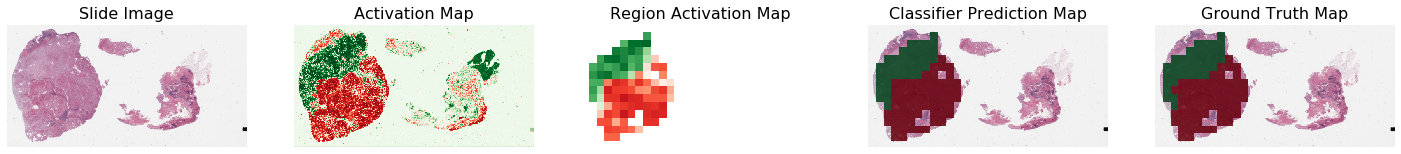

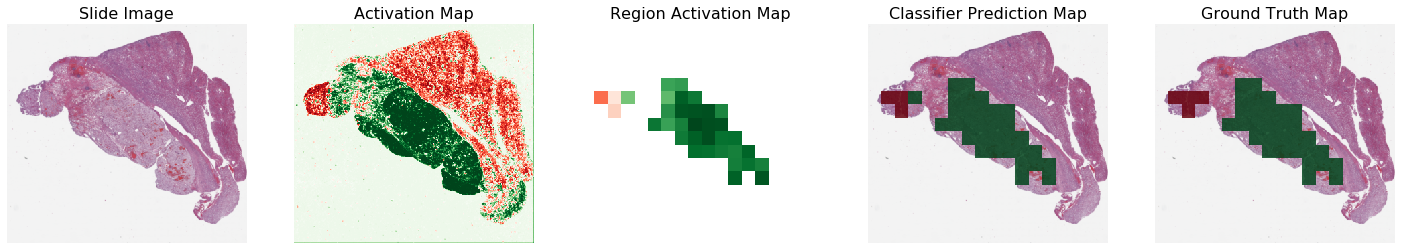

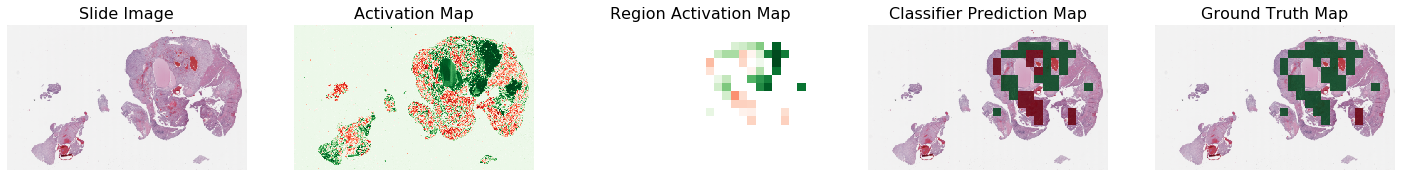

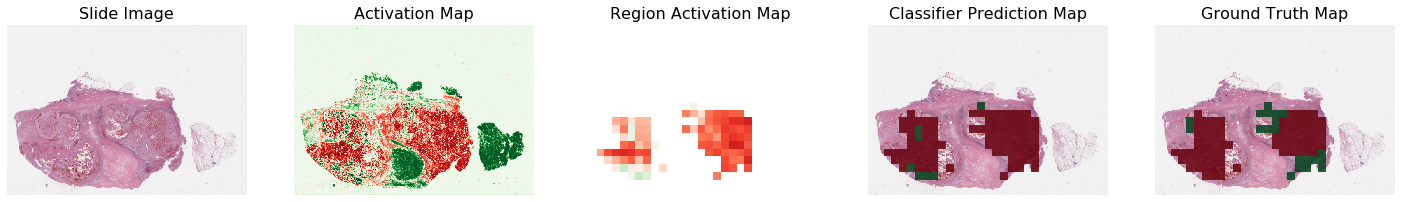

In [18]:
# Supplementary Figure 7
figureNum=7
Figure_Specific_Plots(figureType, figureNum)

## Supplementary Figure 8: Model-Guided probing of genetic heterogeneity 
For this figure, only panels b and c get generated programmatically 

100%|██████████| 1000000/1000000 [02:47<00:00, 5964.74it/s]


Model based selection Rank= 1is better than  98.7877 % of random samplings
Model based selection Rank= 2is better than  98.7877 % of random samplings
Model based selection Rank= 3is better than  86.6715 % of random samplings


100%|██████████| 1000000/1000000 [01:04<00:00, 15388.88it/s]


Model based selection is better than  98.961 % of random samplings


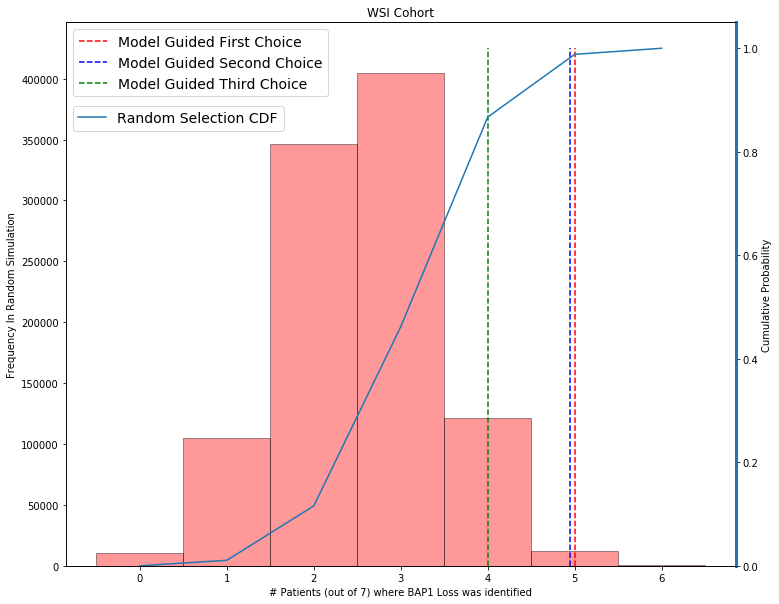

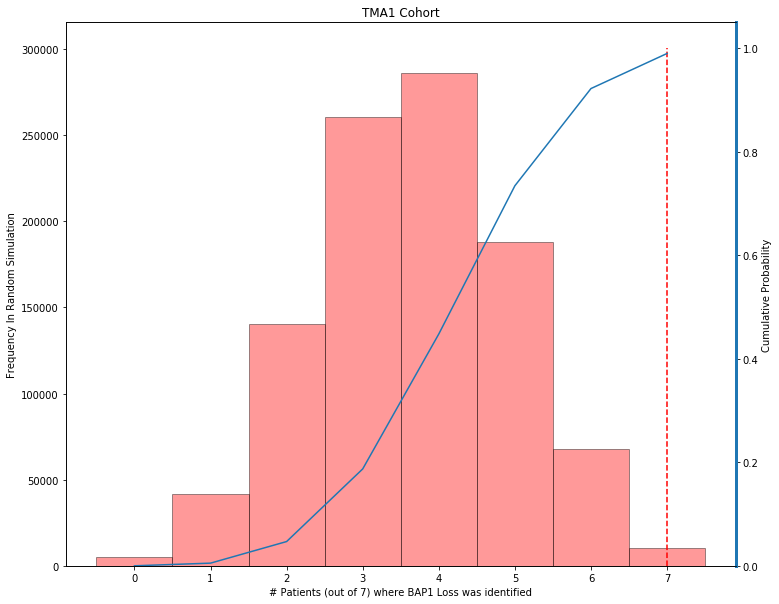

In [7]:
# Supplementary Figure 8
figureNum=8
Figure_Specific_Plots(figureType, figureNum)

## Supplementary Figure 9: Color distribution and effects of normalization

403755 224 1


100% (389 of 389) |######################| Elapsed Time: 0:07:04 Time:  0:07:04


Selecting pixel data for TMA1
Selecting pixel data for TMA2
Selecting pixel data for PDX1
(100000, 1, 3) (100000, 1, 3) (100000, 1, 3)


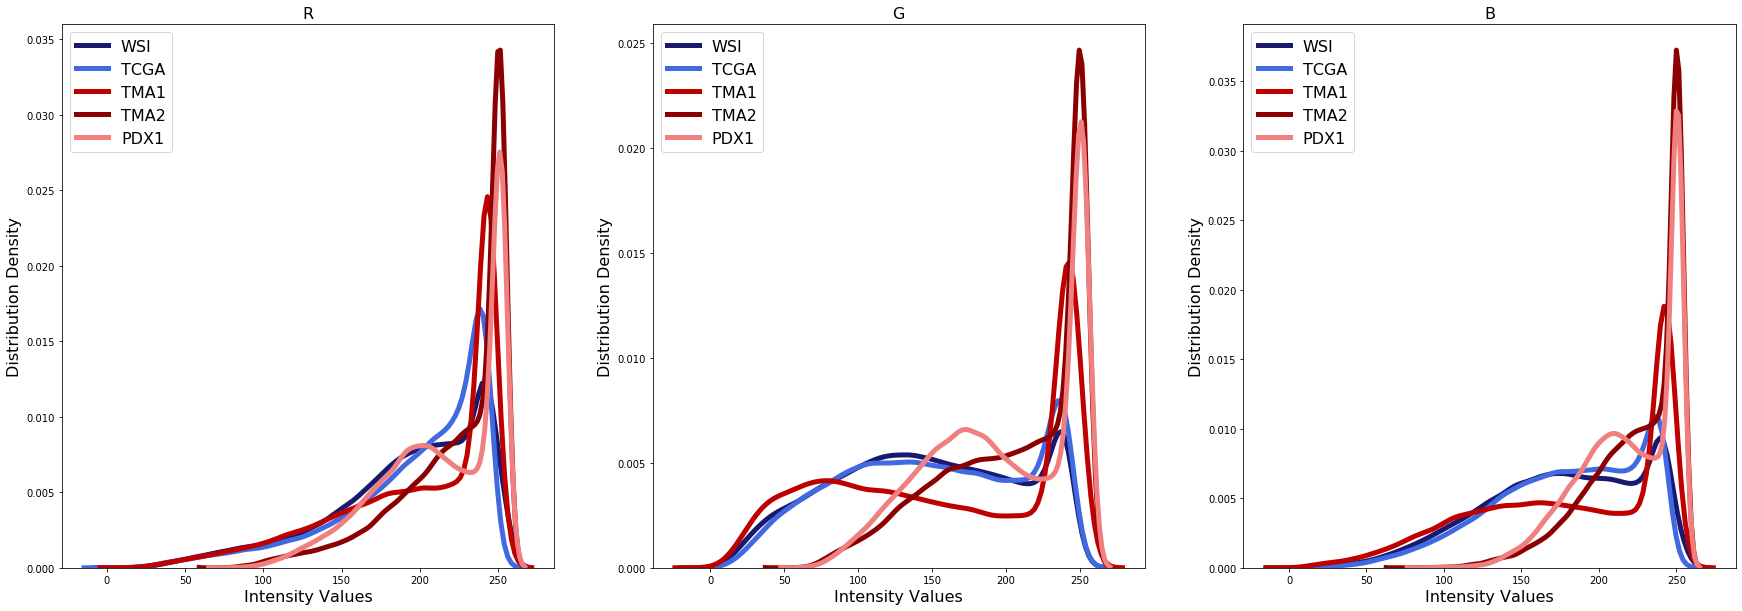

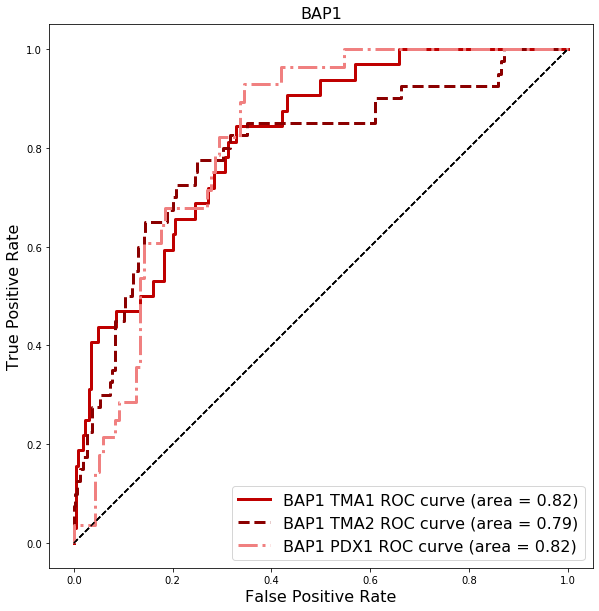

In [9]:
# Supplementary Figure 9
figureNum=9
Figure_Specific_Plots(figureType, figureNum)

## Supplementary Figure 10: Tradeoff between sensitivity of BAP1 loss detection and ability to exclude BAP1 WT samples  

  0%|          | 0/510 [00:00<?, ?it/s]

Plotting regional results


100%|██████████| 510/510 [05:02<00:00,  1.69it/s]


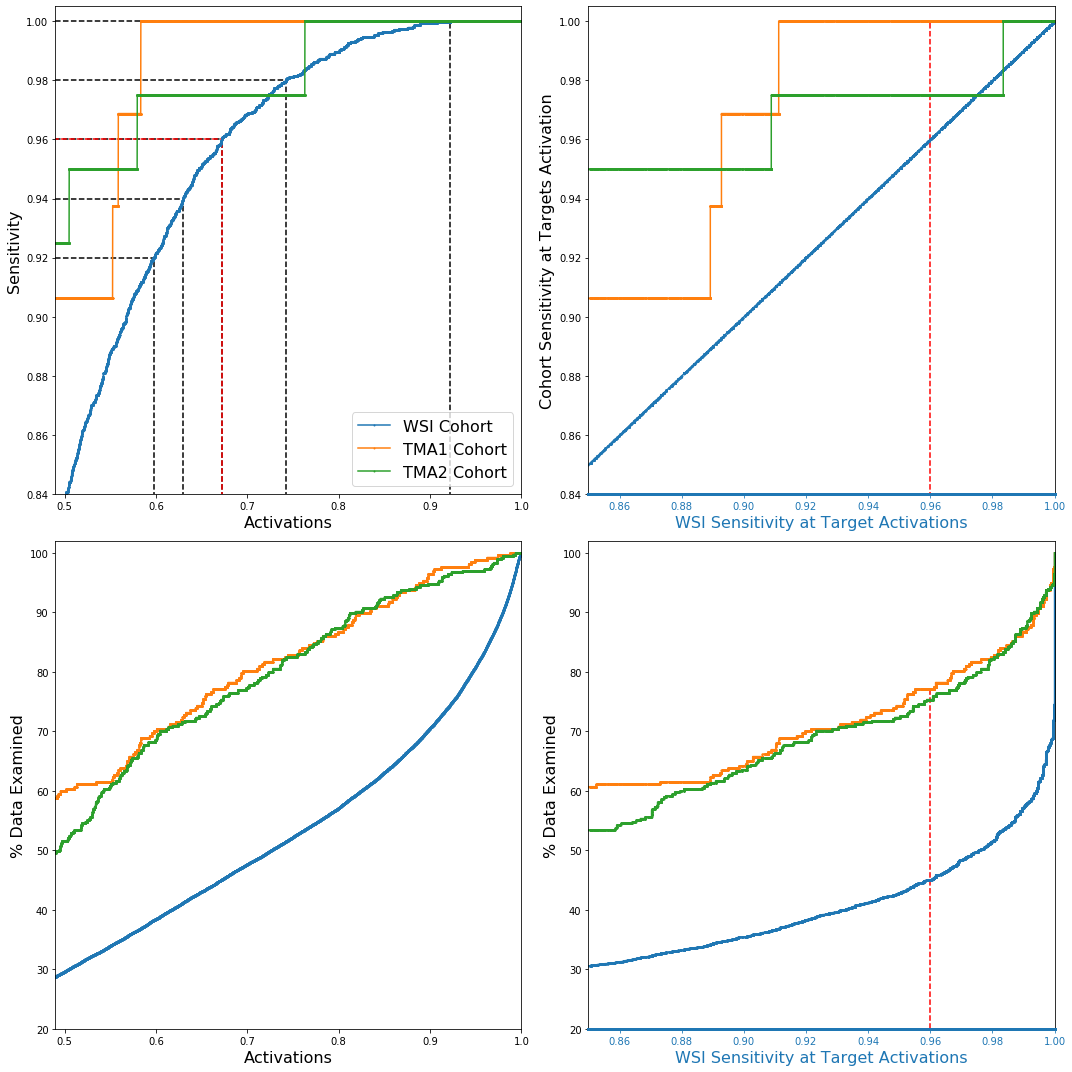

In [13]:
# Supplementary Figure 10
figureNum=10
Figure_Specific_Plots(figureType, figureNum)

## Supplementary Figure 11: Patient Level AUC results for TMA Cohorts

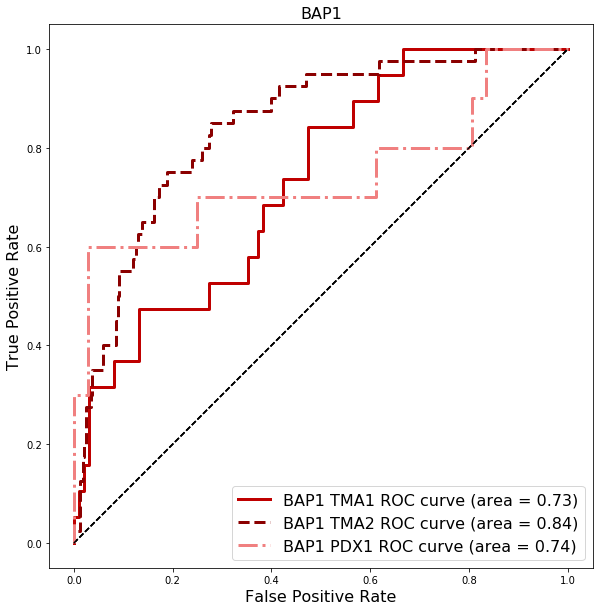

In [10]:
# Supplementary Figure 11
figureNum=11
Figure_Specific_Plots(figureType, figureNum)

## Supplementary Figure 12: Classification Independence

Correlation and p-value for gene pair  ['BAP1', 'SETD2'] :  SpearmanrResult(correlation=0.20138188518383637, pvalue=1.4392772170987904e-05)
Correlation and p-value for gene pair  ['PBRM1', 'SETD2'] :  SpearmanrResult(correlation=0.47648349146916974, pvalue=1.9661223706733713e-26)


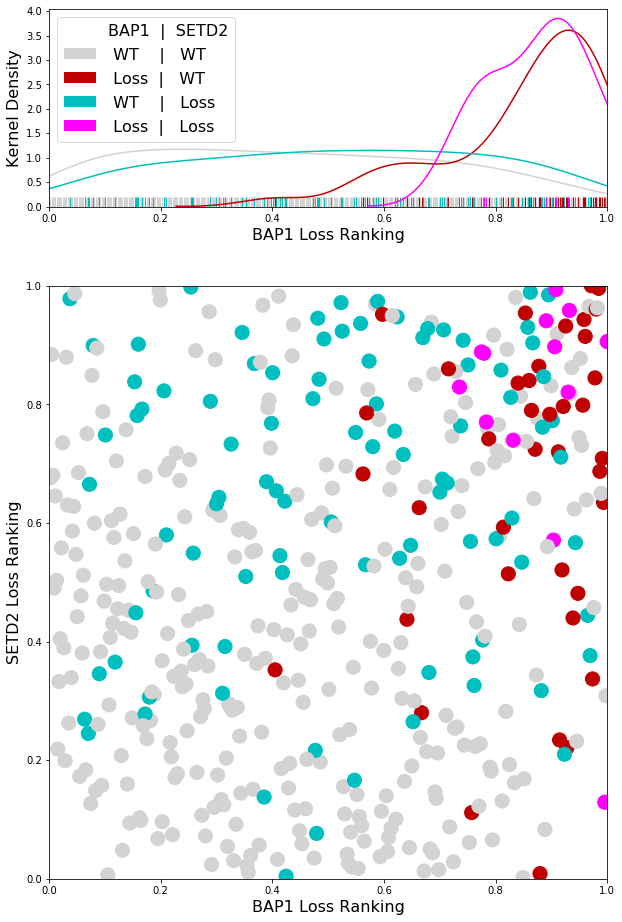

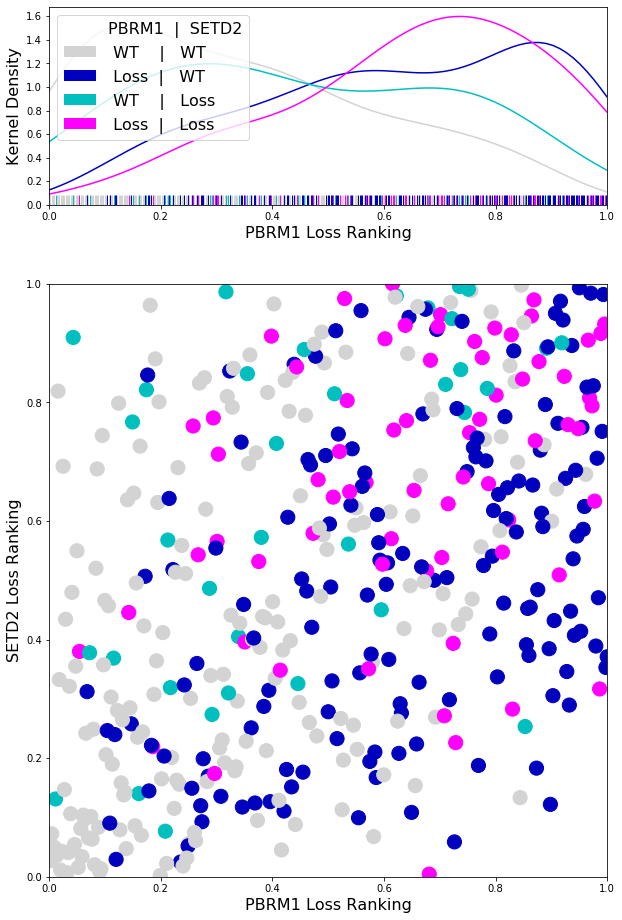

In [21]:
# Supplementary Figure 12
figureNum=12
Figure_Specific_Plots(figureType, figureNum)

## Supplementary Figure 14: Random Forest Performance

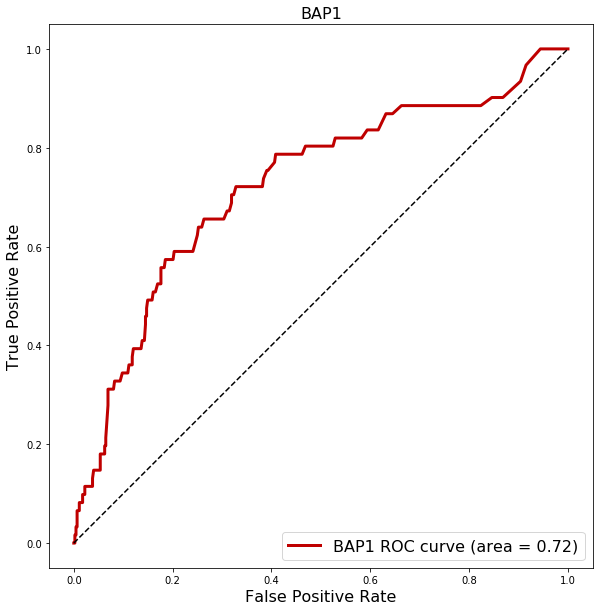

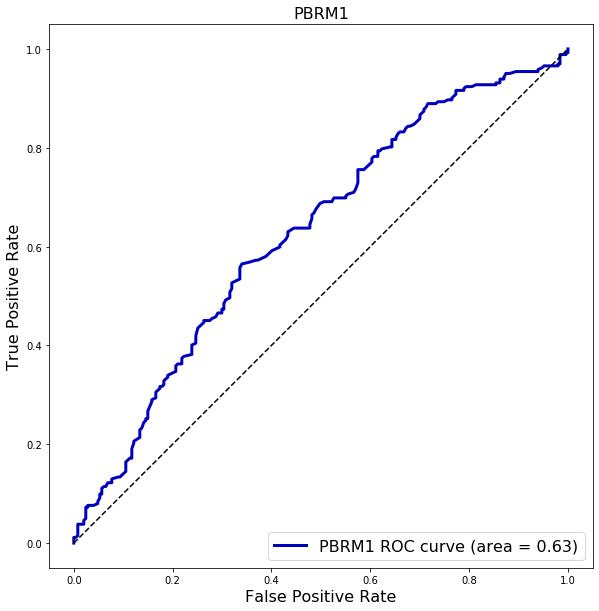

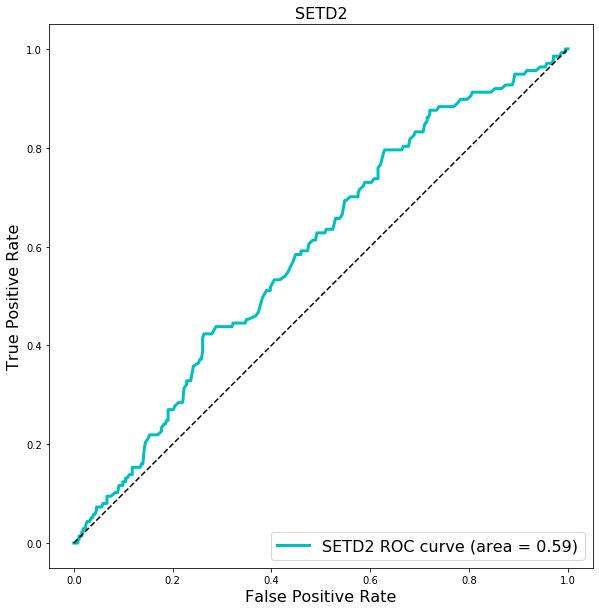

In [11]:
# Supplementary Figure 14
figureNum=14
Figure_Specific_Plots(figureType, figureNum)

## Supplementary Figure 15: Nuclear features that are most different in BAP1 loss and WT 

WT v.s. Loss: Custom statistical test, P_val:6.582e-27
WT v.s. Loss: Custom statistical test, P_val:3.146e-20
WT v.s. Loss: Custom statistical test, P_val:2.823e-18
WT v.s. Loss: Custom statistical test, P_val:4.028e-17
WT v.s. Loss: Custom statistical test, P_val:3.216e-16
WT v.s. Loss: Custom statistical test, P_val:4.085e-15
WT v.s. Loss: Custom statistical test, P_val:2.537e-12
WT v.s. Loss: Custom statistical test, P_val:2.265e-11
WT v.s. Loss: Custom statistical test, P_val:2.513e-09


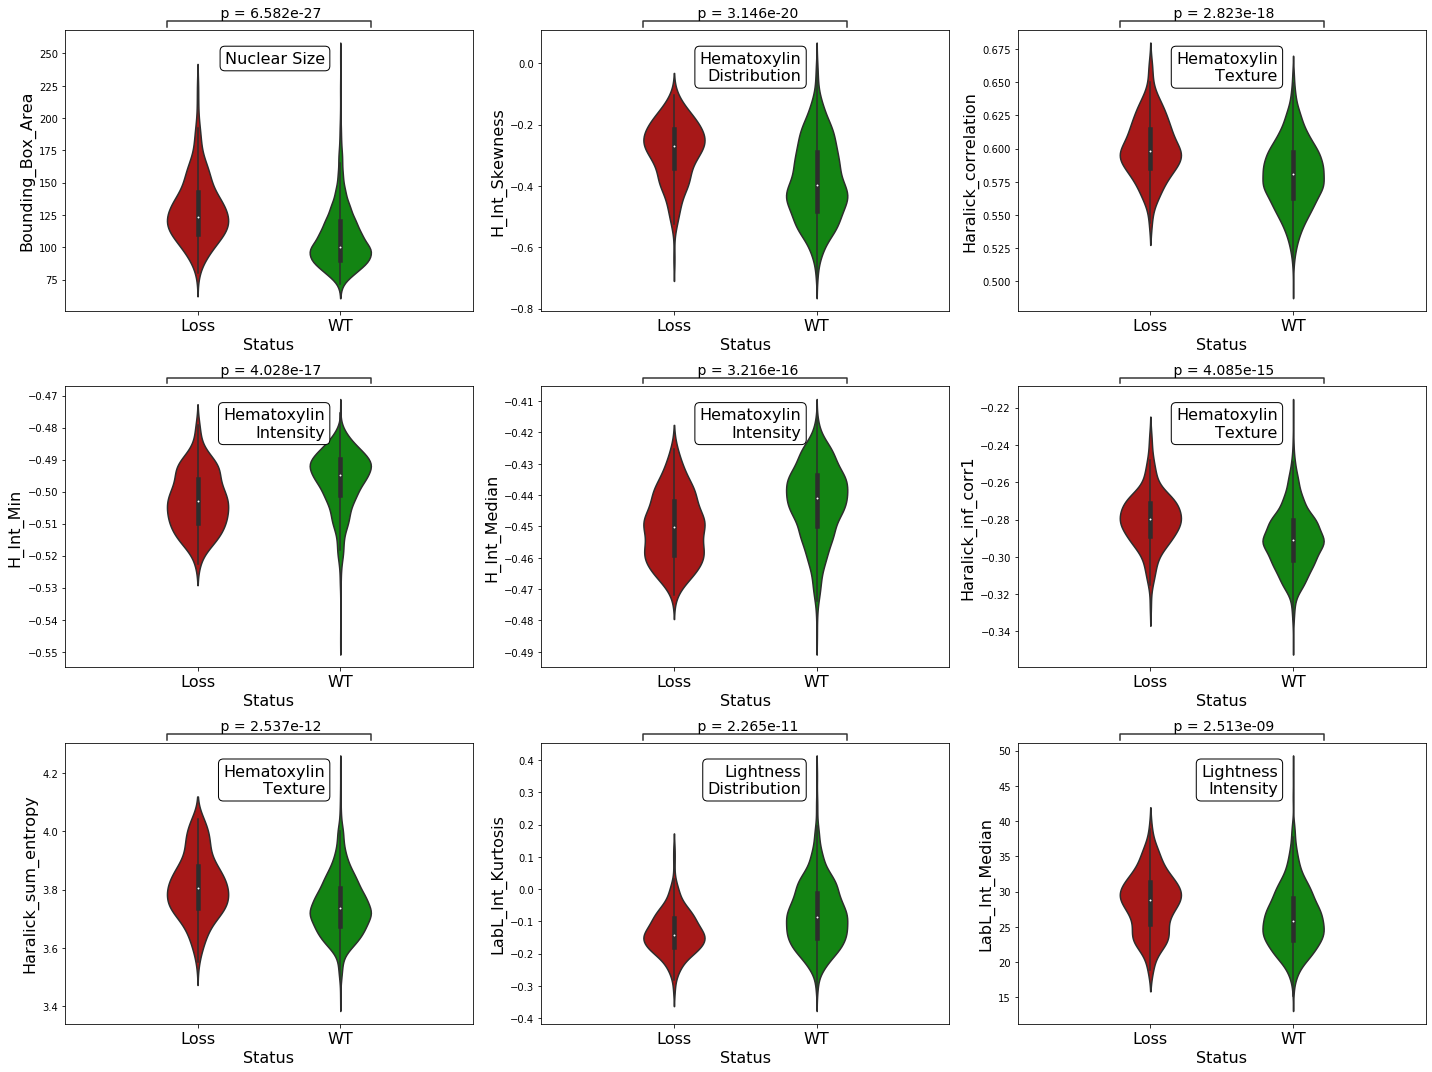

In [25]:
# Supplementary Figure 15
figureNum=15
Figure_Specific_Plots(figureType, figureNum)

## Supplementary Figure 16: Nuclear features that are most different in PBRM1 loss and WT 

WT v.s. Loss: Custom statistical test, P_val:5.379e-06
WT v.s. Loss: Custom statistical test, P_val:6.266e-03
WT v.s. Loss: Custom statistical test, P_val:1.957e-02
WT v.s. Loss: Custom statistical test, P_val:2.895e-02
WT v.s. Loss: Custom statistical test, P_val:5.585e-02
WT v.s. Loss: Custom statistical test, P_val:7.986e-02
WT v.s. Loss: Custom statistical test, P_val:1.286e-01
WT v.s. Loss: Custom statistical test, P_val:1.933e-01
WT v.s. Loss: Custom statistical test, P_val:2.867e-01


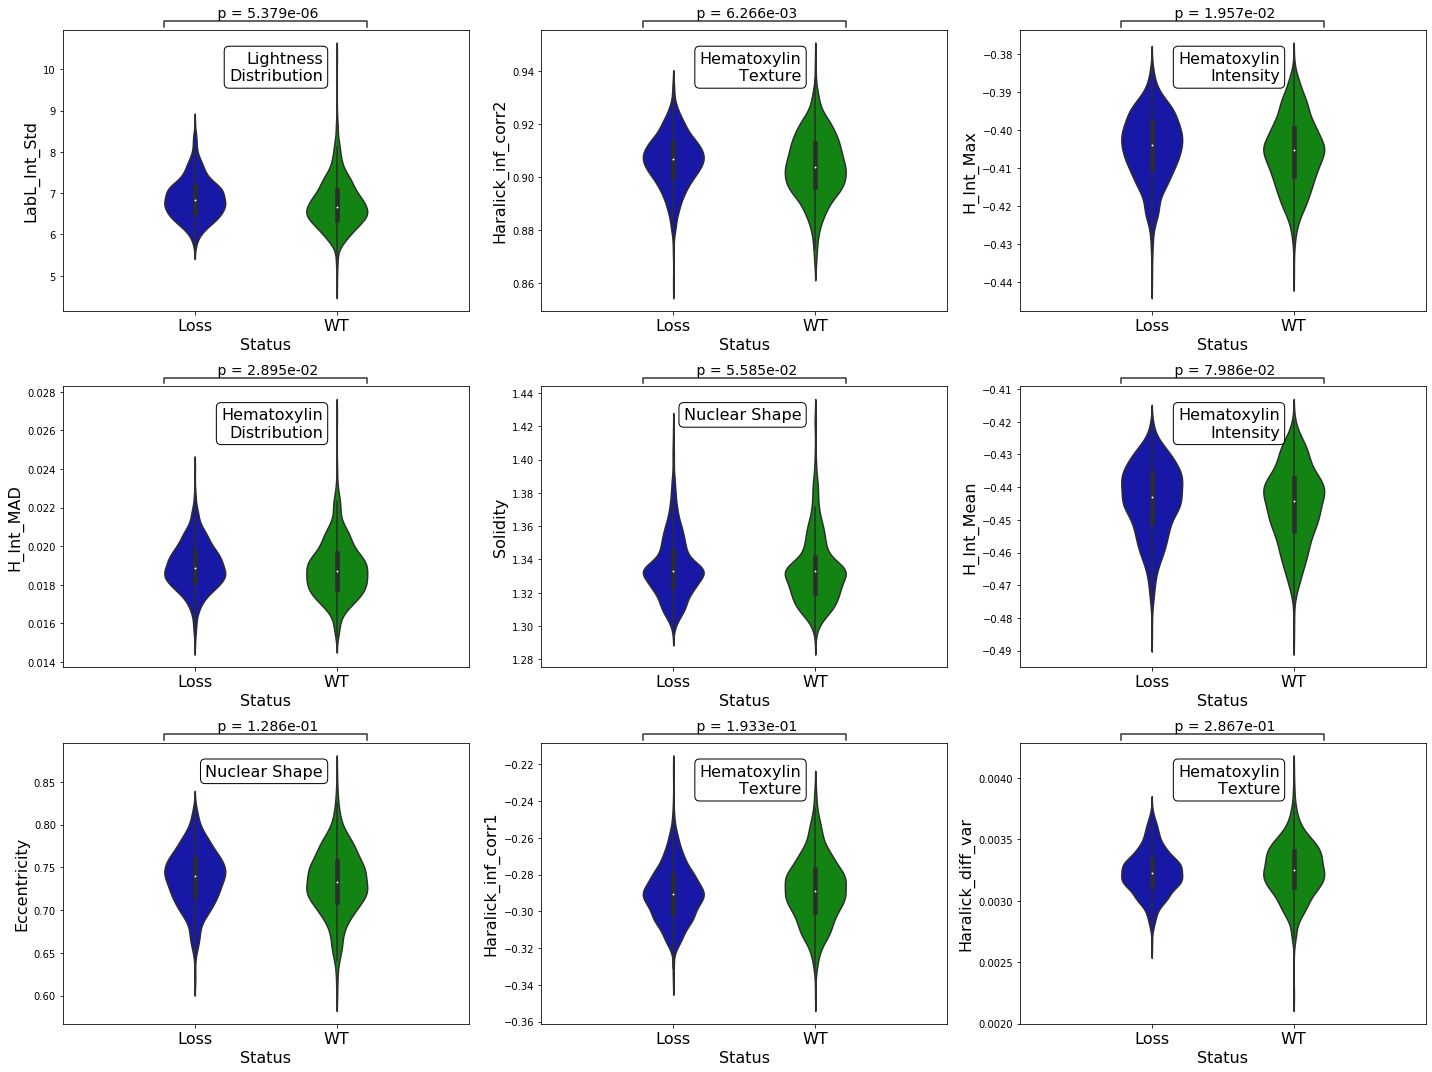

In [26]:
# Supplementary Figure 16
figureNum=16
Figure_Specific_Plots(figureType, figureNum)

## Supplementary Figure 17: Nuclear features that are most different in SETD2 loss and WT 

WT v.s. Loss: Custom statistical test, P_val:8.447e-12
WT v.s. Loss: Custom statistical test, P_val:1.309e-07
WT v.s. Loss: Custom statistical test, P_val:1.706e-07
WT v.s. Loss: Custom statistical test, P_val:7.582e-07
WT v.s. Loss: Custom statistical test, P_val:3.645e-06
WT v.s. Loss: Custom statistical test, P_val:3.994e-06
WT v.s. Loss: Custom statistical test, P_val:1.828e-05
WT v.s. Loss: Custom statistical test, P_val:2.442e-05
WT v.s. Loss: Custom statistical test, P_val:3.055e-05


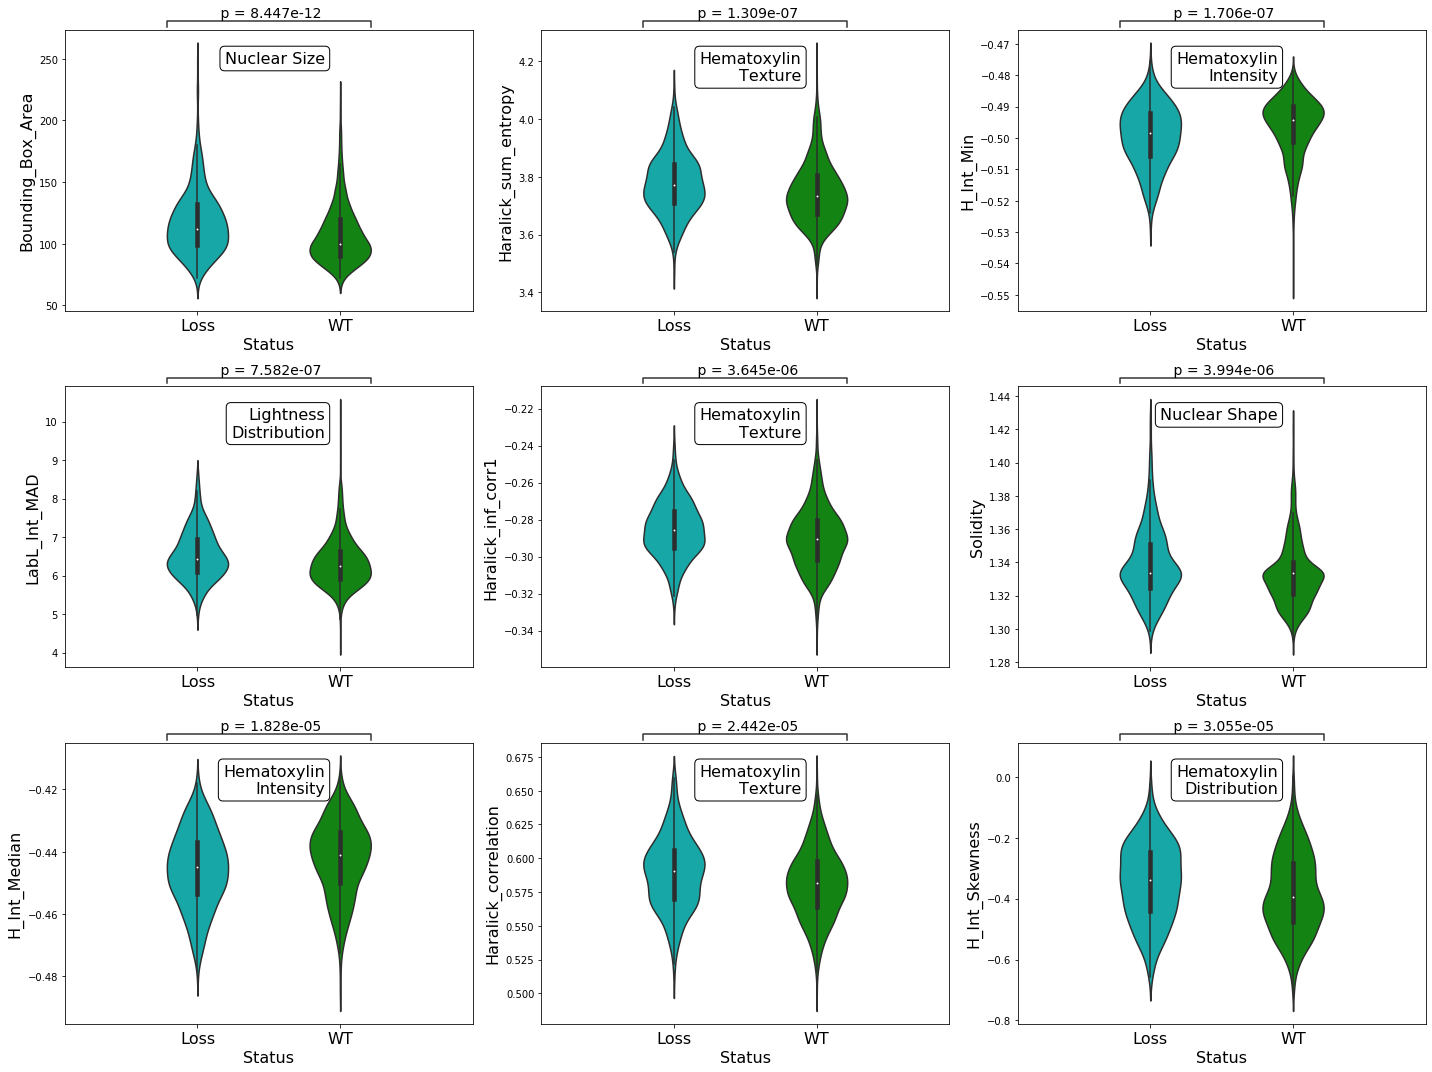

In [27]:
# Supplementary Figure 17
figureNum=17
Figure_Specific_Plots(figureType, figureNum)

## Supplementary Figure 18: Further analysis of BAP1 activations relation to Grade

LowGrade_Loss v.s. LowGrade_WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.248e-02 U_stat=2.000e+02
HighGrade_Loss v.s. HighGrade_WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.857e-02 U_stat=8.040e+02
1_Loss v.s. 1_WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
2_Loss v.s. 2_WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.509e-06 U_stat=2.640e+02
3_Loss v.s. 3_WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.540e-05 U_stat=3.690e+02
4_Loss v.s. 4_WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.200e+01


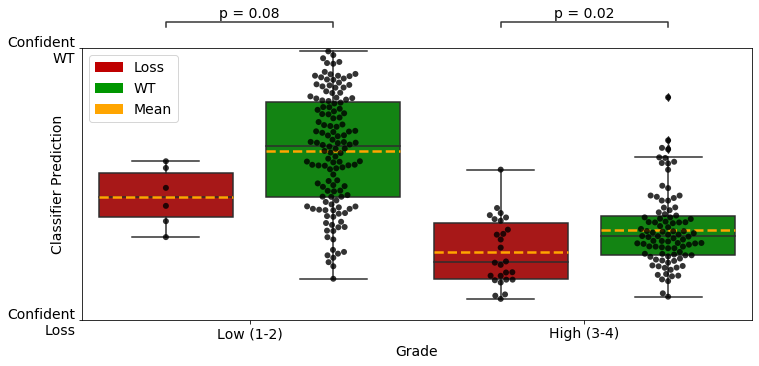

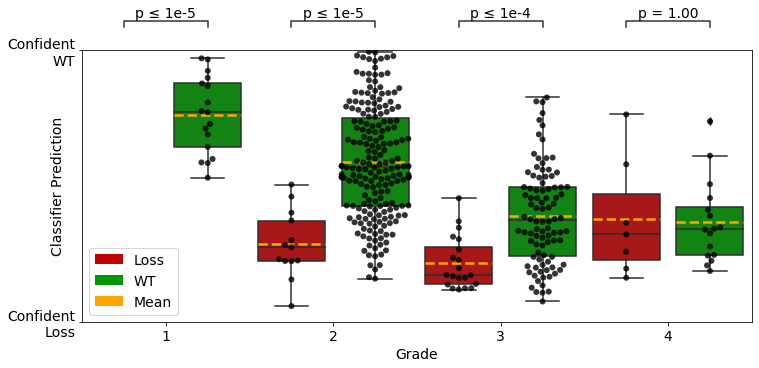

In [12]:
# Supplementary Figure 18
figureNum=18
Figure_Specific_Plots(figureType, figureNum)